<a href="https://colab.research.google.com/github/atakhan27/Data-Science/blob/main/HW8_Solution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#First execute this cell go to Runtime and click on Restart Runtime
!pip install --upgrade --no-deps statsmodels
!pip install tbats

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.1/10.1 MB 61.2 MB/s eta 0:00:00
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.13.5
    Uninstalling statsmodels-0.13.5:
      Successfully uninstalled statsmodels-0.13.5
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 5.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 46.4 MB/s eta 0:00:00


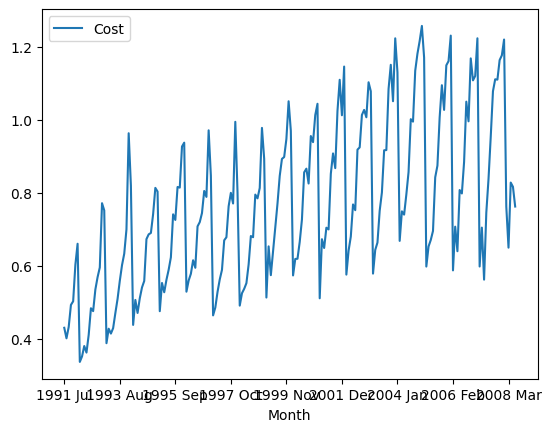

In [ ]:
import pandas as pd
from matplotlib import pyplot
ap1=pd.read_csv('https://raw.githubusercontent.com/ogut77/DataScience/main/data/h02.csv')
ap1=ap1.set_index('Month')
ap1.plot()
pyplot.show()

Using the above data set 
1)Test stationary of the 
dataset.Write hypothesis. What is your conclusion at 5% siginifance level?

2)Take difference and seasonal difference and test stationay of the dataset.Write hypothesis. What is your conclusion at 5% siginifance level?

3) Plot ACF and PACF of series if series' difference and seasonal difference taken .

4) Based on the plot of ACF and PACF, come up with two SARIMA model and compare their Akaike Information Criteri metric.

5)Split data into train and test. For the test data, use last 12 months observation.

6)Plot test, train and forecast values for the SARIMA model chosen at Q4. Evaluate performance of the model in terms of MAE(mean absulate error), MAPE(mean absulate percentage error) and MSE(Mean squared Error).

7) Which model is suitable for Holt Winters' method (Multiplicative or Additive).Briefly explain why? Plot test, train and forecast values for the Holt Winters' method. Evaluate performance of the model in terms of MAE(mean absulate error), MAPE(mean absulate percentage error) and MSE(Mean squared Error).

8) Which model is suitable for ETS method (Multiplicative or Additive for seasonal, trend and error companent. Do we have dampened model or not. ).Briefly explain why? Plot test, train and forecast values for the ETS method. Evaluate performance of the model in terms of MAE(mean absulate error), MAPE(mean absulate percentage error) and MSE(Mean squared Error).

9) Use TBATS model in train data.  Evaluate performance of the model in test data Plot test, train and forecast values for the TBATS  method. in terms of MAE(mean absulate error), MAPE(mean absulate percentage error) and MSE(Mean squared Error).

10) Which model gives the lowes MAPE score?

# **1.**

ADF Statistic: -1.696756
p-value: 0.432785
Critical Values:
	1%: -3.466
	5%: -2.877
	10%: -2.575


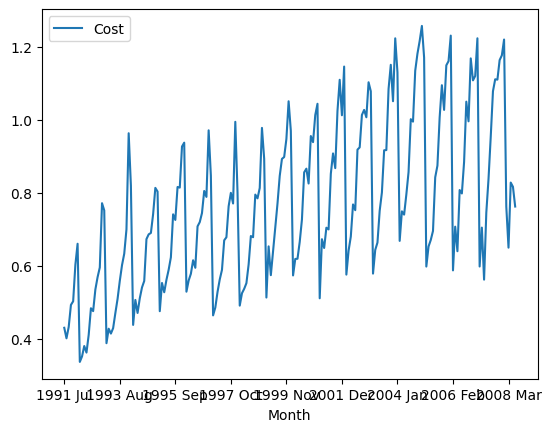

In [ ]:
import pandas as pd
import numpy as np
from statsmodels.tsa.stattools import adfuller
from matplotlib import pyplot

ap1=pd.read_csv('https://raw.githubusercontent.com/ogut77/DataScience/main/data/h02.csv')

ap1=ap1.set_index('Month')
adf_test = adfuller(ap1['Cost'])

print('ADF Statistic: %f' % adf_test[0])
print('p-value: %f' % adf_test[1])
print('Critical Values:')
for key, value in adf_test[4].items():
    print('\t%s: %.3f' % (key, value))

ap1.plot()
pyplot.show()

1). In our case, the ADF statistic is -1.696756, and the p-value is 0.432785.

The ADF statistic is greater than the critical value at a 5% significance level (-2.877). This means we fail to reject the null hypothesis (H0), so we cannot conclude that the time series is stationary based on the ADF test.

Also, the p-value is larger than the significance level of 0.05 (5%), which provides further evidence that we should not reject the null hypothesis. The p-value indicates the probability of seeing the data given that the null hypothesis is true, and a larger p-value means that we have less evidence to reject the null hypothesis.

Therefore, based on the ADF test results, we conclude at a 5% significance level that the time series data is non-stationary. Non-stationary data often needs to be transformed (e.g., via differencing or detrending) before it can be effectively used in many time series models.

#**2.**

In [ ]:
ap1['Cost_diff'] = ap1['Cost'] - ap1['Cost'].shift(1)
ap1['Cost_seasonal_diff'] = ap1['Cost'] - ap1['Cost'].shift(12)

ap1 = ap1.dropna()

adf_test_diff = adfuller(ap1['Cost_diff'])

print('ADF Statistic (First Difference): %f' % adf_test_diff[0])
print('p-value (First Difference): %f' % adf_test_diff[1])
print('Critical Values (First Difference):')
for key, value in adf_test_diff[4].items():
    print('\t%s: %.3f' % (key, value))

adf_test_seasonal_diff = adfuller(ap1['Cost_seasonal_diff'])

print('ADF Statistic (Seasonal Difference): %f' % adf_test_seasonal_diff[0])
print('p-value (Seasonal Difference): %f' % adf_test_seasonal_diff[1])
print('Critical Values (Seasonal Difference):')
for key, value in adf_test_seasonal_diff[4].items():
    print('\t%s: %.3f' % (key, value))

ADF Statistic (First Difference): -3.275070
p-value (First Difference): 0.016030
Critical Values (First Difference):
	1%: -3.468
	5%: -2.878
	10%: -2.576
ADF Statistic (Seasonal Difference): -3.368644
p-value (Seasonal Difference): 0.012075
Critical Values (Seasonal Difference):
	1%: -3.468
	5%: -2.878
	10%: -2.576


2). At a 5% significance level, after taking both the first difference and the seasonal difference, the time series appears to be stationary based on the ADF test. This implies that both differencing techniques have helped to remove the trend and seasonality in the data, making it suitable for further time series analysis.

#**3.**

<ipython-input-4-7946ffc0dcd8>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ap1['Cost_diff'] = ap1['Cost'] - ap1['Cost'].shift(1)
<ipython-input-4-7946ffc0dcd8>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ap1['Cost_seasonal_diff'] = ap1['Cost'] - ap1['Cost'].shift(12)
/usr/local/lib/python3.10/dist-packages/statsmodels/graphics/tsaplots.py:348: FutureWarning: The default method 'yw' can produce PACF values outside of the [-1,1] interval. After 0.13, the default will change tounadjusted Yule-Walker 

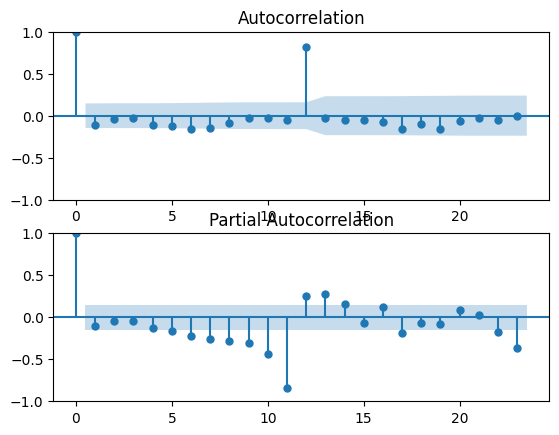

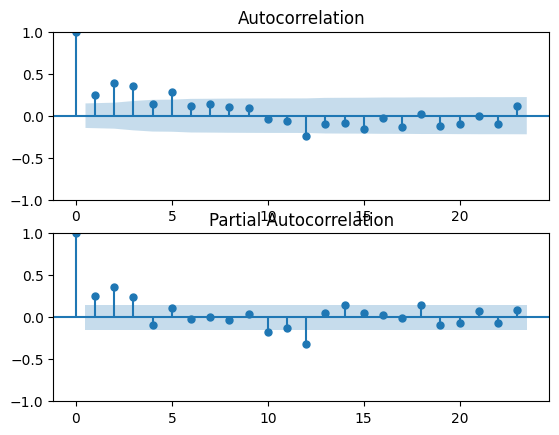

In [ ]:
import pandas as pd
import numpy as np
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from matplotlib import pyplot as plt

ap1['Cost_diff'] = ap1['Cost'] - ap1['Cost'].shift(1)
ap1['Cost_seasonal_diff'] = ap1['Cost'] - ap1['Cost'].shift(12)

ap1 = ap1.dropna()

plt.figure()
plt.subplot(211)
plot_acf(ap1['Cost_diff'], ax=plt.gca())
plt.subplot(212)
plot_pacf(ap1['Cost_diff'], ax=plt.gca())
plt.show()

plt.figure()
plt.subplot(211)
plot_acf(ap1['Cost_seasonal_diff'], ax=plt.gca())
plt.subplot(212)
plot_pacf(ap1['Cost_seasonal_diff'], ax=plt.gca())
plt.show()

#**4.**

In [ ]:
import statsmodels.api as sm

model1 = sm.tsa.SARIMAX(ap1['Cost'], order=(1, 1, 0), seasonal_order=(1, 1, 0, 12))
model1_fit = model1.fit(disp=False)

model2 = sm.tsa.SARIMAX(ap1['Cost'], order=(0, 1, 1), seasonal_order=(0, 1, 1, 12))
model2_fit = model2.fit(disp=False)

print('AIC for model 1: ', model1_fit.aic)
print('AIC for model 2: ', model2_fit.aic)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


AIC for model 1:  -437.5886006828758
AIC for model 2:  -469.6915260086705


#**5.**

In [ ]:
split_point = len(ap1) - 12

train = ap1.iloc[:split_point]
test = ap1.iloc[split_point:]

print('Training Dataset:', train.shape[0])
print('Testing Dataset:', test.shape[0])

Training Dataset: 168
Testing Dataset: 12


#**6.**

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:471: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


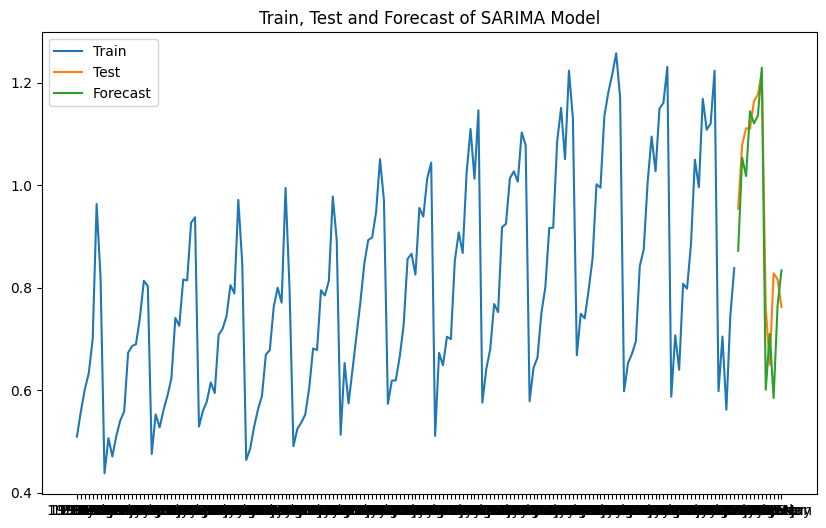

Mean Absolute Error (MAE): 0.07634464811162121
Mean Absolute Percentage Error (MAPE): 8.82686747628465
Mean Squared Error (MSE): 0.009792257997518226


In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_absolute_error, mean_squared_error

def mean_absolute_percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / (y_true + 1e-10))) * 100

model = SARIMAX(train['Cost'], order=(1, 1, 0), seasonal_order=(1, 1, 0, 12))
model_fit = model.fit(disp=False)

forecast = model_fit.predict(start=len(train), end=len(train)+len(test)-1)

plt.figure(figsize=(10,6))
plt.plot(train.index, train['Cost'], label='Train')
plt.plot(test.index, test['Cost'], label='Test')
plt.plot(test.index, forecast, label='Forecast')
plt.legend(loc='best')
plt.title('Train, Test and Forecast of SARIMA Model')
plt.show()

mae = mean_absolute_error(test['Cost'], forecast)
mape = mean_absolute_percentage_error(test['Cost'], forecast)
mse = mean_squared_error(test['Cost'], forecast)

print('Mean Absolute Error (MAE):', mae)
print('Mean Absolute Percentage Error (MAPE):', mape)
print('Mean Squared Error (MSE):', mse)

#**7.**

In [ ]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_absolute_error, mean_squared_error

def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

model_add = ExponentialSmoothing(train['Cost'], trend='add', seasonal='add', seasonal_periods=12)
model_add_fit = model_add.fit()

model_mul = ExponentialSmoothing(train['Cost'], trend='add', seasonal='mul', seasonal_periods=12)
model_mul_fit = model_mul.fit()

forecast_add = model_add_fit.predict(start=len(train), end=len(train)+len(test)-1)
forecast_mul = model_mul_fit.predict(start=len(train), end=len(train)+len(test)-1)

mae_add = mean_absolute_error(test['Cost'], forecast_add)
mape_add = mean_absolute_percentage_error(test['Cost'], forecast_add)
mse_add = mean_squared_error(test['Cost'], forecast_add)

mae_mul = mean_absolute_error(test['Cost'], forecast_mul)
mape_mul = mean_absolute_percentage_error(test['Cost'], forecast_mul)
mse_mul = mean_squared_error(test['Cost'], forecast_mul)

print('Additive model:')
print('Mean Absolute Error (MAE):', mae_add)
print('Mean Absolute Percentage Error (MAPE):', mape_add)
print('Mean Squared Error (MSE):', mse_add)

print('\nMultiplicative model:')
print('Mean Absolute Error (MAE):', mae_mul)
print('Mean Absolute Percentage Error (MAPE):', mape_mul)
print('Mean Squared Error (MSE):', mse_mul)

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


Additive model:
Mean Absolute Error (MAE): 0.0641410875219079
Mean Absolute Percentage Error (MAPE): nan
Mean Squared Error (MSE): 0.007336811215488925

Multiplicative model:
Mean Absolute Error (MAE): 0.06484169570036882
Mean Absolute Percentage Error (MAPE): nan
Mean Squared Error (MSE): 0.006879468731860056


#**8.**

/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)


MAE:  0.06342259958610598
MAPE:  7.494821834098765
MSE:  0.007144180936718845


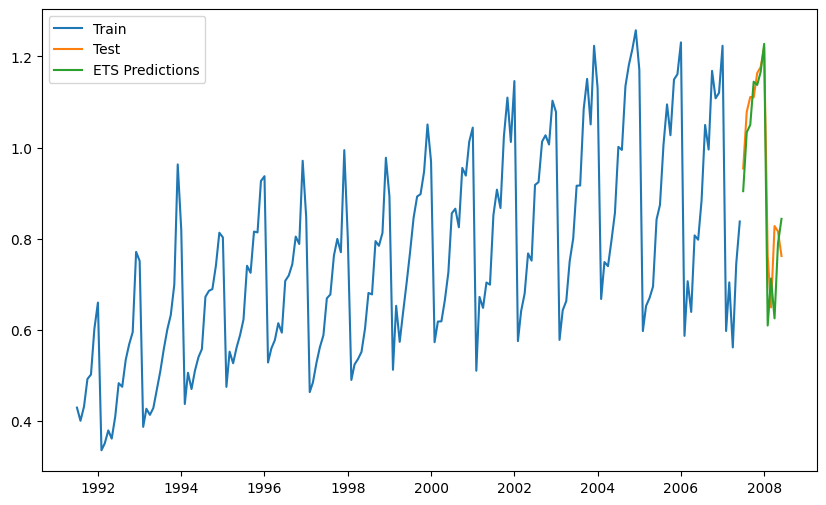

In [ ]:
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from sklearn.metrics import mean_absolute_error, mean_squared_error

train = ap1.iloc[:-12, 0]
test = ap1.iloc[-12:, 0]

model = ExponentialSmoothing(train, trend='add', seasonal='add', seasonal_periods=12)
model_fit = model.fit()

predictions = model_fit.forecast(steps=12)

mae = mean_absolute_error(test, predictions)
mape = np.mean(np.abs((test - predictions) / test)) * 100
mse = mean_squared_error(test, predictions)

print('MAE: ', mae)
print('MAPE: ', mape)
print('MSE: ', mse)

plt.figure(figsize=(10,6))
plt.plot(train.index, train, label='Train')
plt.plot(test.index, test, label='Test')
plt.plot(predictions.index, predictions, label='ETS Predictions')
plt.legend(loc='best')
plt.show()

#**9.**

In [ ]:
!pip install tbats

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


MAE:  0.0891266895364744
MAPE:  9.334577263740044
MSE:  0.009727447798568252


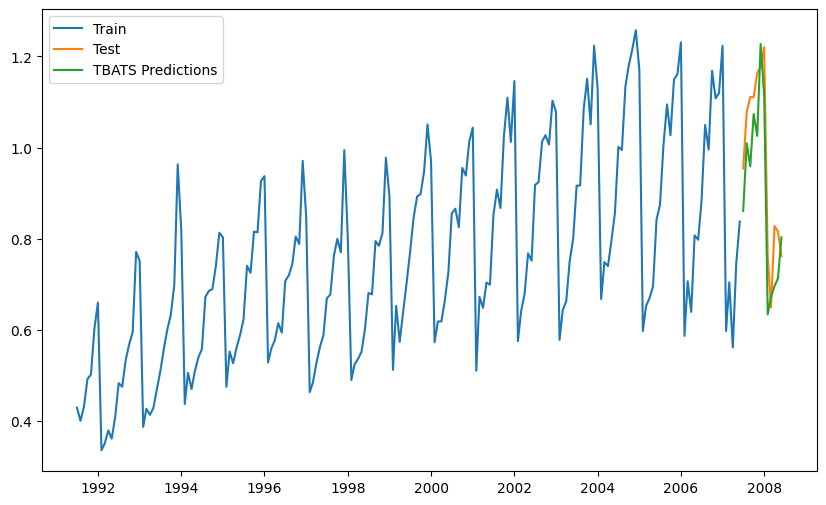

In [ ]:
from tbats import TBATS, BATS
from sklearn.metrics import mean_absolute_error, mean_squared_error

train = ap1.iloc[:-12, 0]
test = ap1.iloc[-12:, 0]

model = TBATS(seasonal_periods=[12])
model_fit = model.fit(train)

predictions = model_fit.forecast(steps=12)

mae = mean_absolute_error(test, predictions)
mse = mean_squared_error(test, predictions)
mape = np.mean(np.abs((test - predictions) / test)) * 100

print('MAE: ', mae)
print('MAPE: ', mape)
print('MSE: ', mse)

plt.figure(figsize=(10,6))
plt.plot(train.index, train, label='Train')
plt.plot(test.index, test, label='Test')
plt.plot(test.index, predictions, label='TBATS Predictions')
plt.legend(loc='best')
plt.show()

#**10.**

In [ ]:
mape_sarima = 8.8268
mape_ets = 7.4948
mape_tbats = 9.3345

min_mape = min(mape_sarima, mape_ets, mape_tbats)

if min_mape == mape_sarima:
    print('SARIMA has the lowest MAPE.')
elif min_mape == mape_ets:
    print('ETS has the lowest MAPE.')
else:
    print('TBATS has the lowest MAPE.')

ETS has the lowest MAPE.
